# Linear Regression Model
Beginner, you can download dataset [here](https://www.kaggle.com/datasets/mayankpatel14/second-hand-used-cars-data-set-linear-regression/download?datasetVersionNumber=1)

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from keras.layers import Normalization, Dense, InputLayer
from keras.losses import MeanAbsoluteError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
import matplotlib.pyplot as plt

**Data Preparation**

This dataset contains 12 columns but i'm not use them all and only use columns that i understand.


> Columns for the X_input

1.   Years
2.   Km
3.   Rating
4.   Condition
5.   Economy
6.   Top Speed
7.   Hp
8.   Torque

So the shape of the X_input is (N by 8).

> Column for the y_output

1.   Current Prices

The shape of the y_output is (N by 1).

In [2]:
data = pd.read_csv("train.csv")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


visualize the dataset (only the columns we use), to better understand the relation between each column and value.



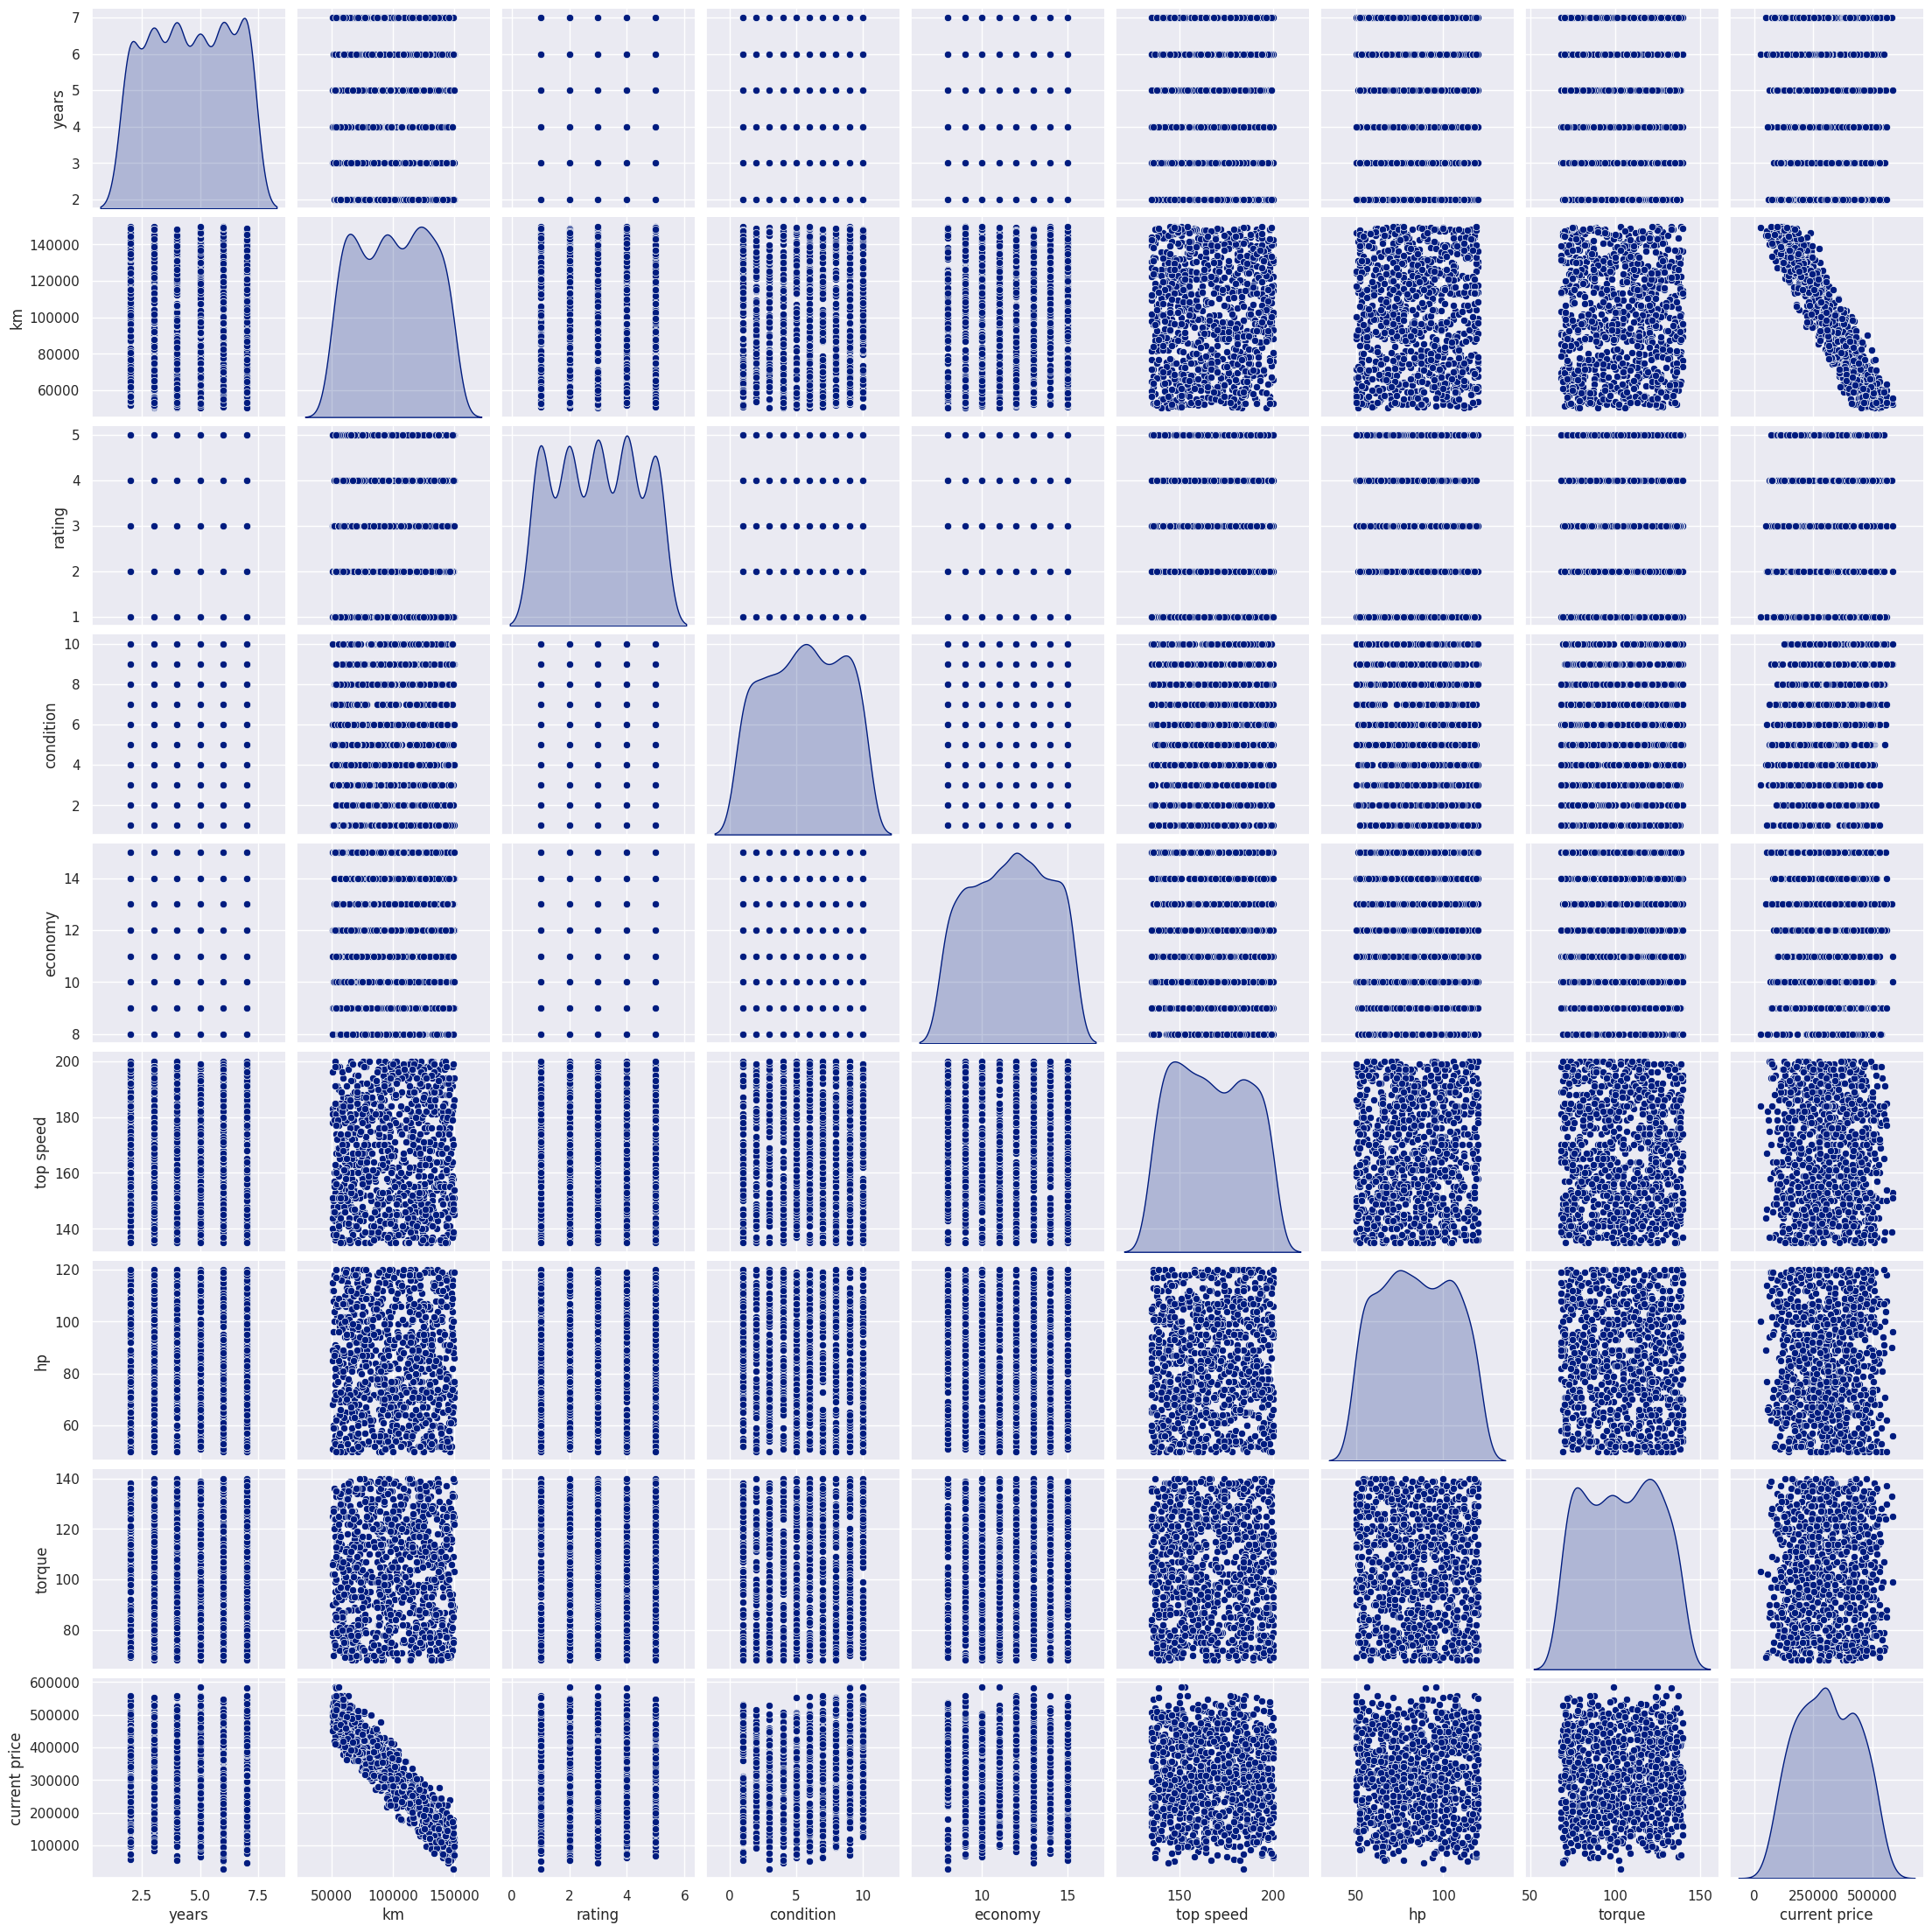

In [3]:
sns.set(style="darkgrid")
sns.set_palette("dark")
sns.pairplot(data[["years", "km", "rating", "condition", "economy", "top speed", "hp", "torque", "current price"]], diag_kind="kde") ### kde = kernel density estimate

convert the data into tensors

In [4]:
tensor_data = tf.constant(data)
print(tensor_data.shape) ### 1000 is the rows, and 12 is the total columns

(1000, 12)


shuffle the data to avoid any bias based on the way the data was gathered with random shuffling. So the "*indexing order*" is no longer respected.

In [5]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[7.370000e+02 5.309510e+05 7.410860e+05 4.000000e+00 1.163180e+05
  3.000000e+00 8.000000e+00 1.500000e+01 1.710000e+02 1.060000e+02
  1.180000e+02 1.870500e+05]
 [4.000000e+01 6.694140e+05 8.257230e+05 4.000000e+00 1.241360e+05
  3.000000e+00 3.000000e+00 1.000000e+01 1.590000e+02 5.000000e+01
  9.000000e+01 2.509550e+05]
 [3.840000e+02 6.311540e+05 8.631170e+05 4.000000e+00 9.246100e+04
  5.000000e+00 1.000000e+01 1.200000e+01 1.940000e+02 7.800000e+01
  1.050000e+02 4.286025e+05]
 [9.280000e+02 5.560140e+05 7.766920e+05 6.000000e+00 1.083150e+05
  3.000000e+00 3.000000e+00 1.500000e+01 1.650000e+02 1.200000e+02
  9.300000e+01 2.297495e+05]
 [2.860000e+02 5.423930e+05 7.356710e+05 2.000000e+00 1.166260e+05
  2.000000e+00 1.000000e+00 1.100000e+01 1.430000e+02 5.800000e+01
  1.380000e+02 1.727585e+05]], shape=(5, 12), dtype=float64)


Defining the X_input. ":" take means all the rows, "3:-1" means we take columns only from the 3th column from 0, 1, 2, 3 untill one column before the last column.

In [6]:
X_input = tensor_data[:, 3:-1]
print(X_input[:5])
print(X_input.shape) ### 1000, 8 = 1000 rows, 8 columns

tf.Tensor(
[[4.00000e+00 1.16318e+05 3.00000e+00 8.00000e+00 1.50000e+01 1.71000e+02
  1.06000e+02 1.18000e+02]
 [4.00000e+00 1.24136e+05 3.00000e+00 3.00000e+00 1.00000e+01 1.59000e+02
  5.00000e+01 9.00000e+01]
 [4.00000e+00 9.24610e+04 5.00000e+00 1.00000e+01 1.20000e+01 1.94000e+02
  7.80000e+01 1.05000e+02]
 [6.00000e+00 1.08315e+05 3.00000e+00 3.00000e+00 1.50000e+01 1.65000e+02
  1.20000e+02 9.30000e+01]
 [2.00000e+00 1.16626e+05 2.00000e+00 1.00000e+00 1.10000e+01 1.43000e+02
  5.80000e+01 1.38000e+02]], shape=(5, 8), dtype=float64)
(1000, 8)


Define the y_input, we take all rows ":" of the last column "-1".  

In [7]:
y_output = tensor_data[:, -1]
y_output = tf.expand_dims(y_output, axis=-1)
print(y_output[:5])

tf.Tensor(
[[187050. ]
 [250955. ]
 [428602.5]
 [229749.5]
 [172758.5]], shape=(5, 1), dtype=float64)


**Slice / Split The Dataset**



In [14]:
TRAIN_RATIO = 0.8 # 80% Total data for training
VAL_RATIO = 0.1 # 10% Total data for validation
TEST_RATIO = 0.1 # 10% Total data for testing
DATASET_SIZE = len(X_input) # Total samples from our dataset

**Data For Training**

First our *X_input* = column 3 to column 8, we calculate this *(DATASET_SIZE * TRAIN_RATIO)* first.\
*:int* simply means take all the first 800 elements (rows) from *X_input* and store it on *X_train* variable for training.

same for the y_output

In [15]:
X_train = X_input[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y_output[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


this cell below is use to speed up the training

In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [17]:
for x,y in train_dataset:
  print(x,y)
  break

tf.Tensor(
[[2.00000e+00 1.16626e+05 2.00000e+00 1.00000e+00 1.10000e+01 1.43000e+02
  5.80000e+01 1.38000e+02]
 [4.00000e+00 9.24610e+04 5.00000e+00 1.00000e+01 1.20000e+01 1.94000e+02
  7.80000e+01 1.05000e+02]
 [3.00000e+00 8.70050e+04 3.00000e+00 9.00000e+00 1.30000e+01 1.42000e+02
  5.60000e+01 1.38000e+02]
 [6.00000e+00 1.08315e+05 3.00000e+00 3.00000e+00 1.50000e+01 1.65000e+02
  1.20000e+02 9.30000e+01]
 [2.00000e+00 1.49654e+05 4.00000e+00 4.00000e+00 9.00000e+00 1.45000e+02
  7.60000e+01 1.33000e+02]
 [4.00000e+00 1.05905e+05 3.00000e+00 1.00000e+00 1.30000e+01 1.60000e+02
  5.20000e+01 1.30000e+02]
 [4.00000e+00 1.24136e+05 3.00000e+00 3.00000e+00 1.00000e+01 1.59000e+02
  5.00000e+01 9.00000e+01]
 [5.00000e+00 1.00534e+05 1.00000e+00 9.00000e+00 1.50000e+01 1.37000e+02
  7.20000e+01 1.19000e+02]
 [5.00000e+00 1.13147e+05 3.00000e+00 5.00000e+00 9.00000e+00 1.89000e+02
  8.40000e+01 1.04000e+02]
 [3.00000e+00 1.09797e+05 4.00000e+00 9.00000e+00 9.00000e+00 1.46000e+02
  6.40

  X_val = X_input[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATI0))]:\
  This line creates a subset of your input features (X_input) for validation. It takes elements starting from the index int(DATASET_SIZE*TRAIN_RATIO) up to, but not including, the element at index int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATI0)). Essentially, you are taking a portion of your input features after the training set for validation.\
  
  y_val = y_output[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATI0))]: Similarly, this line creates a subset of your output labels (y_output) for validation. It corresponds to the output labels for the selected validation set.

In [18]:
X_val = X_input[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y_output[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [19]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

X_test = X_input[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)): ]:\
This line creates a subset of your input features (X_input) for testing. It takes elements starting from the index int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)) until the end of the sequence. Essentially, you are taking the portion of your input features after both the training and validation sets for testing.

y_test = y_output[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)): ]:\
Similarly, this line creates a subset of your output labels (y_output) for testing. It corresponds to the output labels for the selected test set.

In [20]:
X_test = X_input[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y_output[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [21]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

**Normalization**

To make the model train faster we normalize the data in this case the input. For every input we subtract the X - *mean* devided by *standart deviation* so our input have been rescale before fit it into our model.

X - *m* / *standart deviation*

standart deviation^2 = square_root(variance)

if we have value 3 and 4 the

*mean* = 3.5

*stdr* = 0.5



In [22]:
normalizer = Normalization()
normalizer.adapt(X_train) ## .adapt means to find the means and variance on our data automatically
normalizer(X_input)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.32381043,  0.5814228 , -0.00983766,  0.8546786 ,  1.5104927 ,
         0.19456463,  1.0449711 ,  0.70049495],
       [-0.32381043,  0.8515677 , -0.00983766, -0.91301197, -0.75072443,
        -0.42146975, -1.6996305 , -0.6281339 ],
       [-0.32381043, -0.24293722,  1.4210862 ,  1.5617548 ,  0.1537624 ,
         1.3752972 , -0.3273297 ,  0.08363158],
       [ 0.8378436 ,  0.3048854 , -0.00983766, -0.91301197,  1.5104927 ,
        -0.11345255,  1.7311214 , -0.4857808 ],
       [-1.4854645 ,  0.5920655 , -0.7252996 , -1.6200882 , -0.29848102,
        -1.2428489 , -1.3075446 ,  1.6495156 ]], dtype=float32)>

In [23]:
print(X_input[:5])

tf.Tensor(
[[4.00000e+00 1.16318e+05 3.00000e+00 8.00000e+00 1.50000e+01 1.71000e+02
  1.06000e+02 1.18000e+02]
 [4.00000e+00 1.24136e+05 3.00000e+00 3.00000e+00 1.00000e+01 1.59000e+02
  5.00000e+01 9.00000e+01]
 [4.00000e+00 9.24610e+04 5.00000e+00 1.00000e+01 1.20000e+01 1.94000e+02
  7.80000e+01 1.05000e+02]
 [6.00000e+00 1.08315e+05 3.00000e+00 3.00000e+00 1.50000e+01 1.65000e+02
  1.20000e+02 9.30000e+01]
 [2.00000e+00 1.16626e+05 2.00000e+00 1.00000e+00 1.10000e+01 1.43000e+02
  5.80000e+01 1.38000e+02]], shape=(5, 8), dtype=float64)


**Modeling (Linear Regression Model)**

in this case our model is basically an equation of *Y = mX + C*

*X* = input

*Y* = output

*m* = weight

*C* = bias

so our input *X* is get into the model multiplied by *m* and then we obtain *mX* and then it gets added to *C*

(*X* --> *m* * *mX* *+* *C* = *Y*)

what we're trying to do is to get the most appropriate value for the *m*, & *C* so that we have the best output which best to represent our dataset.

the way the "Dense" layer works is that we have input *X* that goes into the *Dense* layer and the multiplied by the *weight* * *input* *+* *bias* *=* *y_predicted* as the output.

in the *model.summary()* output we have *trainable params* section, this explain that we have *N* variable input (input_shape = (8)) that have *m1 * X1 + m2 * X2* untill *m8 * X8 + C*. so we have 8 weights and 1 bias making it 9 different parameters.

In [24]:
model = tf.keras.Sequential([
    InputLayer(input_shape = (8)),
    normalizer,
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(1) # 1 is how many output do we want to have
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
________________

plot the model

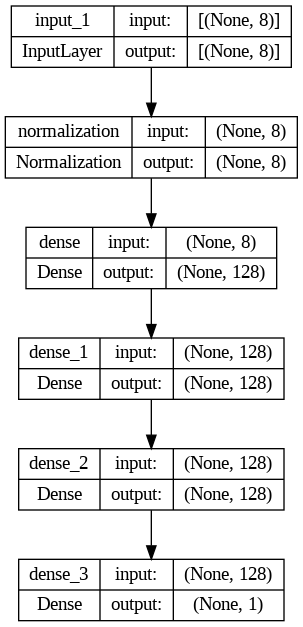

In [25]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

**Error Sanction**\
the way we calculate the error is\
(*Ya - Ypred)^2*\
*Ya* = actual value that we have from the data\
*Ypred* = model predicted value

With *MeanAbsoluteError* we don't need to use *^2* after the subtraction

**Training and Optimization**\
we call our model as linear function that we're trying to fit such that the *mX* and the *C* are peaked so that the errors are minimize. In order to get the *mX* and *C*, method commonly use today is SGD (Stochastic Gradient Descent)

In [26]:
model.compile(optimizer=Adam(learning_rate=0.1), loss = MeanAbsoluteError(), metrics=RootMeanSquaredError())

**SGD Formula**\
*W = W − learning_rate × ∇loss(W)*

*W* = is the weight vector or *m*.\
*learning_rate* = is the learning rate, a hyperparameter that determines the size of the step taken during optimization.\
*∇loss(W)* = ∇loss(W) is the gradient of the loss function with respect to the weights.

it can be written more explicitly as

*W = W − learning_rate × ∂W / ∂loss​*

*Epochs* is basically means to specify the number of times we are going to update our weights or SGD steps.

In [27]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 100, verbose=2)

Epoch 1/100
25/25 - 3s - loss: 153443.1875 - root_mean_squared_error: 205106.5625 - val_loss: 68558.2891 - val_root_mean_squared_error: 82109.8516 - 3s/epoch - 106ms/step
Epoch 2/100
25/25 - 0s - loss: 52068.0508 - root_mean_squared_error: 64890.7617 - val_loss: 49315.0547 - val_root_mean_squared_error: 60677.7930 - 82ms/epoch - 3ms/step
Epoch 3/100
25/25 - 0s - loss: 43882.5156 - root_mean_squared_error: 54597.0898 - val_loss: 43892.6211 - val_root_mean_squared_error: 54285.2227 - 84ms/epoch - 3ms/step
Epoch 4/100
25/25 - 0s - loss: 41140.4258 - root_mean_squared_error: 51041.8828 - val_loss: 39699.5938 - val_root_mean_squared_error: 49317.7031 - 83ms/epoch - 3ms/step
Epoch 5/100
25/25 - 0s - loss: 39613.3008 - root_mean_squared_error: 49461.2734 - val_loss: 41644.9492 - val_root_mean_squared_error: 51353.1445 - 84ms/epoch - 3ms/step
Epoch 6/100
25/25 - 0s - loss: 41709.4688 - root_mean_squared_error: 52330.0586 - val_loss: 51220.7266 - val_root_mean_squared_error: 62564.0312 - 84ms/e

In [28]:
history.history

{'loss': [153443.1875,
  52068.05078125,
  43882.515625,
  41140.42578125,
  39613.30078125,
  41709.46875,
  42047.71875,
  40202.828125,
  40839.7734375,
  39954.67578125,
  40624.796875,
  45833.10546875,
  41798.13671875,
  39426.00390625,
  43406.92578125,
  40672.47265625,
  40963.3203125,
  38395.06640625,
  39910.06640625,
  38480.0859375,
  39165.32421875,
  40828.15625,
  36924.14453125,
  34930.80078125,
  36719.4296875,
  36280.76171875,
  36786.73828125,
  35104.2265625,
  37246.8984375,
  38442.82421875,
  35838.1484375,
  36703.06640625,
  40548.6015625,
  36804.37890625,
  38313.5859375,
  35301.203125,
  35105.94140625,
  37516.83984375,
  37110.4609375,
  35900.5703125,
  35879.05078125,
  37570.50390625,
  36092.50390625,
  35060.21484375,
  35942.734375,
  35070.56640625,
  37469.953125,
  38074.4296875,
  37126.47265625,
  35795.12890625,
  34408.86328125,
  35037.72265625,
  37267.40234375,
  35432.50390625,
  34553.32421875,
  36033.921875,
  35461.55078125,
  37

**Plot The Model Performance**

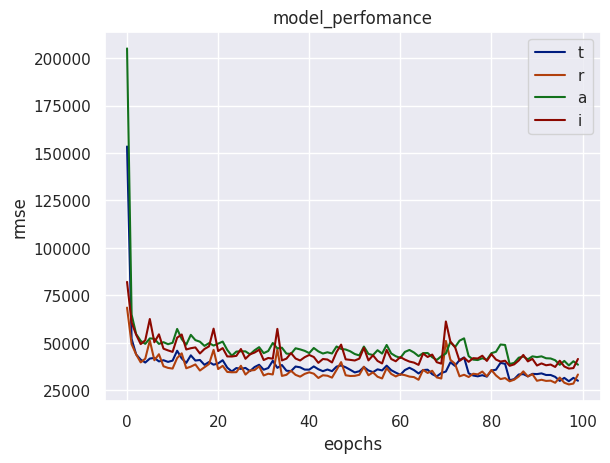

In [29]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("eopchs")
plt.legend("train")

plt.plot(history.history["root_mean_squared_error"])
plt.plot(history.history["val_root_mean_squared_error"])
plt.title("model_perfomance")
plt.ylabel("rmse")
plt.xlabel("eopchs")
plt.legend("train")
plt.show()

In [30]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 14ms/step - loss: 52088.4336 - root_mean_squared_error: 60851.1250


[52088.43359375, 60851.125]

**Prediction**

you can also do **model.predict(tf.expand_dims(X_test[0], axis = 0 ))** it mean predict the car price on (index 0) of the element on X_test, use that as an "input", the output is the model prediction.\
if you want to compare it to original value that we have on our dataset, we can simply do **y_test[0]**

select all the elements (rows) in the first column on **y_test**, convert it into the numpy array, and we put it as *list*

In [31]:
y_true = list(y_test[:,0].numpy())

**model.predict(X_test)[:,0]** means, predict the output of each samples on *X_test* but only on all the element of the first column **[:,0]**, put that results as a *list* or Numpy-like array.

In [32]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

4/4 [==============================] - 0s 3ms/step
[214280.33, 257011.89, 220827.89, 193182.17, 453465.34, 520825.78, 151323.31, 471058.8, 145121.08, 176889.38, 196718.5, 333388.7, 515501.1, 247035.03, 312259.1, 251613.69, 252384.8, 182258.95, 158851.72, 251169.31, 323095.2, 258276.11, 214984.5, 361937.47, 287911.0, 570343.25, 269311.7, 480229.94, 192305.06, 565594.75, 219521.7, 475857.8, 408045.1, 534261.56, 514781.3, 328111.1, 156516.77, 446055.2, 253926.8, 205513.75, 370881.47, 552408.5, 318943.22, 198566.31, 356630.25, 442807.53, 198154.3, 367734.53, 323120.53, 251583.22, 162680.3, 231409.08, 395505.56, 201935.2, 485039.88, 156207.25, 207100.03, 322274.3, 355657.47, 310407.53, 534475.3, 430371.16, 378995.03, 132641.33, 378338.8, 351712.16, 215588.81, 132877.89, 151413.94, 184112.2, 151094.12, 269775.7, 169518.92, 435347.78, 185440.11, 513217.38, 426467.1, 433136.72, 301015.7, 209767.5, 286268.6, 328489.94, 351153.94, 478226.3, 116637.21, 250449.06, 186423.45, 545773.7, 180096.89, 3

**ind = np.arange(100)** This line creates an array (ind) containing values from 0 to 99. It's used to represent the indices or positions of the bars on the x-axis.

**plt.figure(figsize=(40, 20))** This line sets the size of the figure (the entire plot) to be 40 units wide and 20 units tall.

**width = 0.2** This variable represents the width of each bar in the bar plot.

**plt.bar(ind, y_pred, width, label="Predicted Car Price")** This line creates a bar plot where the x-axis positions are given by ind, the heights of the bars are given by the predicted car prices (y_pred), and the width of each bar is specified by width. The label parameter is used to label these bars as "Predicted Car Price."

**plt.bar(ind + width, y_true, width, label="Actual Car Price")** Similarly, this line creates another set of bars with the same width but shifted to the right by width. The heights of these bars are given by the actual car prices (y_true). The label parameter is used to label these bars as "Actual Car Price."

**plt.xlabel("Actual vs Predicted")** Sets the label for the x-axis.

**plt.ylabel("Car Price Prices")** Sets the label for the y-axis.

**plt.show()** Finally, this line displays the plot.

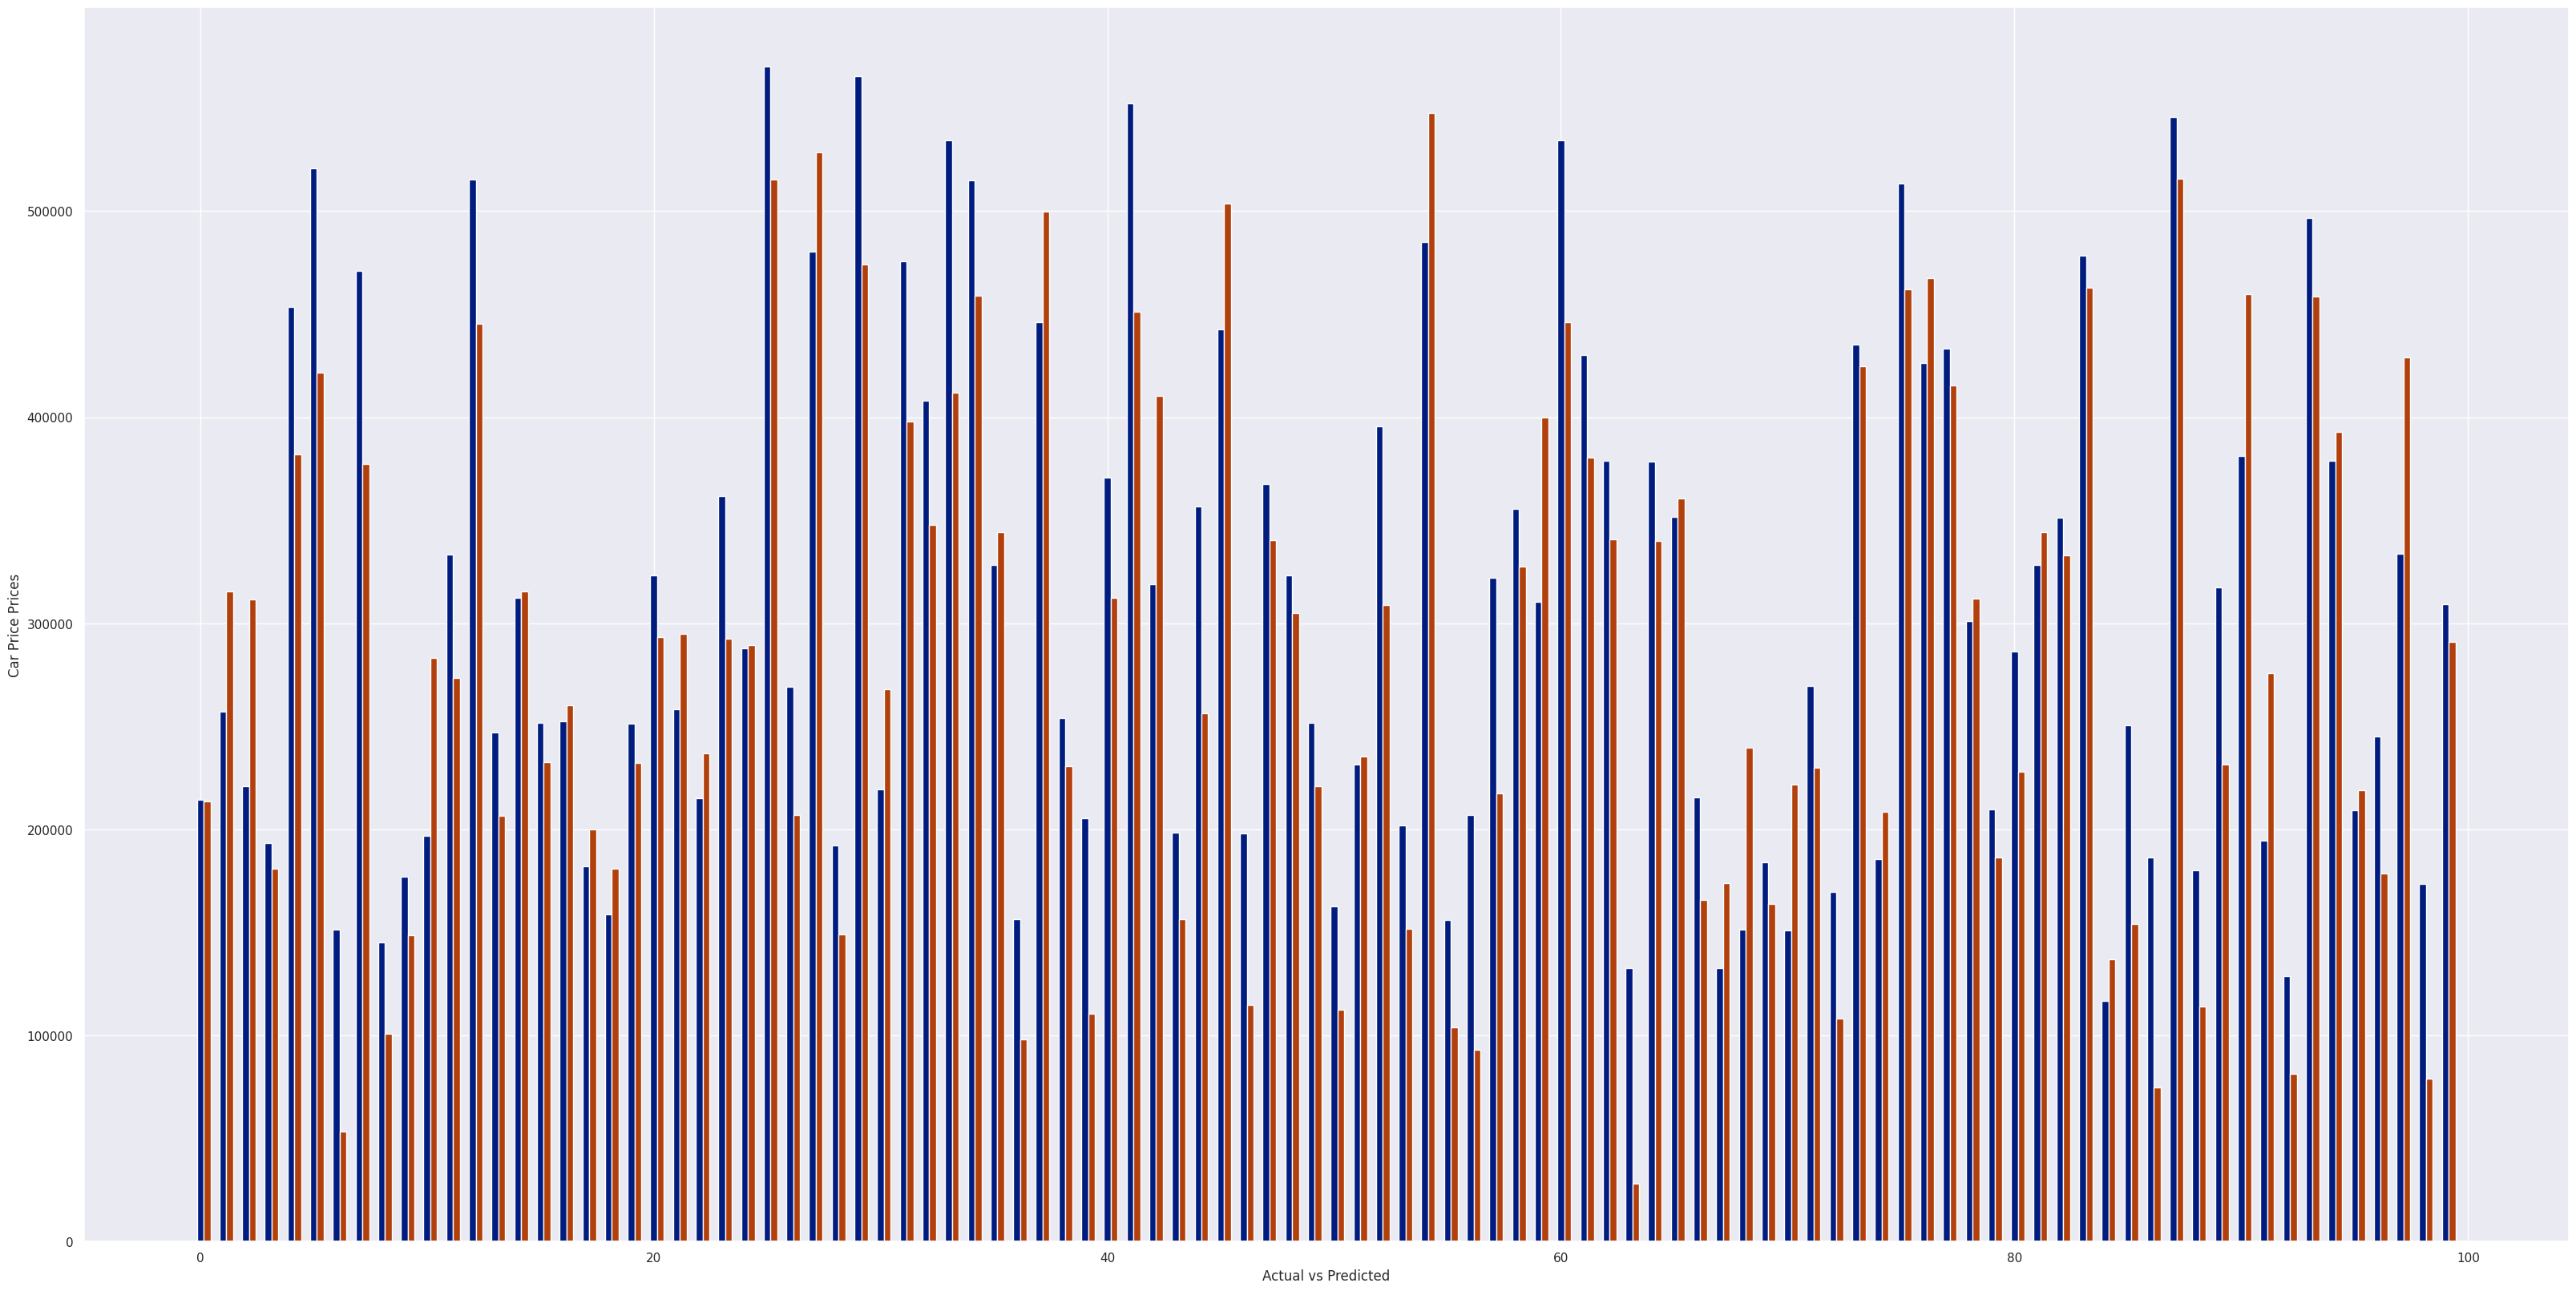

In [34]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.3

plt.bar(ind, y_pred, width, label="Predicted Car Price")
plt.bar(ind + width, y_true, width, label="Actual Car Price")

plt.xlabel("Actual vs Predicted")
plt.ylabel("Car Price Prices")

plt.show()

watch the full lesson here [here](https://www.youtube.com/watch?v=IA3WxTTPXqQ&t=9300s)